# Revenue Model to Analyze profitablity

#### - Praveen Reddy Guntaka

##  Problem Statement 

For a real estate company which has a niche in purchasing properties to rent out <span style="color:red"> short-term </span> as part of their business model specifically within <span style="color:green"> New York City. </span> which company has already concluded that <span style="color:green"> two bedroom </span> properties are the most profitable; needs to know which zip codes are the best to invest in.

With Data Analysis we draw meaningful insights and conclusions to help them understand which zip codes would generate the most profit on <span style="color:red"> short-term </span> rentals within <span style="color:green"> New York City. </span>

##  Assumptions

1. The investor will pay for the property in cash (i.e. no mortgage/interest rate).


2. The time value of money discount rate is 0%


3. All properties and all square feet within each locale can be assumed to be homogeneous.


4. The occupancy rate of rentals is assumed to be 75% regardless of holidays, weekends, seasonal offers and discounts.


5. The real estate company would like to rent out the properties for 365 days in a year.



6. The listing price or the rent obtained from property is constant in a year.



7. Cleaning fee  and Security Deposit are charged for Aannual Operating cost/ Manintenance only and no profits from this is expected.


8. 10% of the total revenue generated is accounted for additional operating costs.


9. Extra guests and their cost is not taken into account.



10. The median house price is cosidered at zipcode level, irrespective of various factors such as size, type, age of the property.

### **In order to achive this we drive our work with 5 main segments:**

    
**1.** Importing required packages & Data

**2.** Data wrangling and Quality check

**3.** Data Analysis

**4.** Joining Airbnb and Zillow

**5.** Model Building and Analysis

Conclusions & Future Scope 


##  <span style="color:green"> <center> 1. Importing required packages & Data </center> </span>

    Importing all required packages.

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import stdev
from missingpy import KNNImputer
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#Importing required package
import missingno as msno
import matplotlib.pyplot as plt

    Jupyter Notebook Setup

In [2]:
pip install missingpy

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

## Package Plan ##

  environment location: /Users/praveen1/anaconda3

  added / updated specs:
    - missingno


The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1d-h0b31af3_0 --> pkgs/main::openssl-1.1.1d-h1de35cc_3

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.11.~ --> conda-forge/label/gcc7::ca-certificates-2018.10.15-ha4d7672_0
  certifi            conda-forge::certifi-2019.11.28-py37_0 --> conda-forge/label/gcc7::certifi-2018.8.24-py37_1001


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/praveen1/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         156 KB
    ------------------------------------------------------------
                                           Total:         156 KB

The following packages will be UPDATED:

  ca-certificates    conda-forge/label/gcc7::ca-certificat~ --> pkgs/main::ca-certificates-2019.11.27-0
  certifi            conda-forge/label/gcc7::certifi-2018.~ --> pkgs/main::certifi-2019.11.28-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  geopandas               conda-forge::geopandas-0.6.2-py_0 --> pkgs/main::geopandas-0.6.1-py_0



certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transacti

In [5]:
conda install --channel conda-forge geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/praveen1/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         148 KB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2019.11.27~ --> conda-forge::ca-certificates-2019.11.28-hecc5488_0
  geopandas                 pkgs/main::geopandas-0.6.1-py_0 --> conda-forge::geopandas-0.6.2-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge
  openssl              pkgs/main::openssl-1.1.1d-h1de35cc_3 --> conda-forge::openssl-1.1.1d-h0b31af3_0

In [6]:
#Importing Airbnb dataset

Airbnb_raw_data = pd.read_csv('listings.csv')

In [7]:
Airbnb_raw_data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN


In [8]:
Airbnb_raw_data.shape

(48895, 106)

'listings.csv' consist of data collected from **Airbnb** - 48,895 observations with 106 attributes

<center > Zillow Dataset </center>

In [9]:
#Importing Zillow dataset

zillow_data = pd.read_csv('Zip_Zhvi_2bedroom.csv')

In [10]:
zillow_data.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300


In [11]:
zillow_data.shape

(8946, 262)

'Zip_Zhvi_2bedroom.csv' consist of data collected from Zillow - 8,946 observations with 262 attributes, this is a time series data and hence date frames are captured in attributes.

## <span style="color:green"> <center>  2. Data wrangling and Quality check  </center></span>

### <span style="color:brown"> <center> 2.1 Data Slicing </center></span>

<center><span style="color:purple"> a. Airbnb Dataset: </span></center>

Real estate company has already concluded that **two bedroom** properties are the most profitable & needs to know which zipcodes are best to invest in, we restrict our analysis on two bedroom properties alone. Which can be eaily filtered from the dataset as below.

In [12]:
#Slicing it with the key factor #bedrooms as our interest is in 2 bedrooms only
Airbnb_raw_data = Airbnb_raw_data[Airbnb_raw_data['bedrooms']==2]

Not all the attributes are important for this analysis. We very well know the curse of dimensionality for Data analysis and Visualization. So, based on the requirement we can filter out some of the attributes.

In [13]:
#Selecting only required attributes for analysis
Airbnb_raw_data = Airbnb_raw_data.loc[:,['id',
                                         'neighbourhood_group_cleansed',
                                         'zipcode',
                                         'latitude',
                                         'longitude',
                                         'property_type',
                                         'room_type',
                                         'accommodates',
                                         'price',
                                         'weekly_price',
                                         'monthly_price',
                                         'security_deposit',
                                         'cleaning_fee',
                                         'minimum_nights',
                                         'review_scores_location']]

In [14]:
Airbnb_raw_data.shape

(6497, 15)

    These attribute names are sometimes hard to understand as they were picked from a raw data source, but we can change these names with more interpretable way for anyone to read and understand the technicalities of the code.

In [15]:
#Renaming attributenames with more meaningfull names
Airbnb_data = Airbnb_raw_data.rename(columns={'id':'ID', 
                                              'neighbourhood_group_cleansed':'Neighbourhood', 
                                              'property_type':'Property Type',
                                              'room_type':'Room Type', 
                                              'accommodates':'Accommodates',
                                              'price':'Price' ,
                                              'weekly_price':'Weekly Price', 
                                              'monthly_price': 'Monthly Price',
                                              'security_deposit':'Security Deposit',
                                              'cleaning_fee':'Cleaning Fee', 
                                              'minimum_nights' : 'Minimum Nights',
                                              'review_scores_location':'Location Reviews'})

<center><span style="color:purple"> b. Zillow Dataset: </center>

In [16]:
zillow_data = zillow_data[['RegionID', 'RegionName', 'City', 'CountyName', 'SizeRank', '2017-06']]

In [17]:
zillow_data = zillow_data[zillow_data.City == 'New York'].rename(columns={'RegionName':'zipcode', 
                                                                          '2017-06':'Property Cost'})

### <span style="color:brown"><center> 2.2 Data Cleaning & Missing Value Treatment </center></span>

<center><span style="color:purple"> a. Airbnb Dataset: </center>

    Let us look into the data first and see where to start.

In [18]:
Airbnb_data.head()

,ID,Neighbourhood,zipcode,latitude,longitude,Property Type,Room Type,Accommodates,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Minimum Nights,Location Reviews
19,7750,Manhattan,10029,40.79685,-73.94872,Apartment,Entire home/apt,4,$190.00,NaN,NaN,NaN,NaN,7,NaN
48,13050,Brooklyn,11221,40.68554,-73.94090,Townhouse,Entire home/apt,5,$115.00,$850.00,NaN,$150.00,$85.00,3,9.0
52,14290,Brooklyn,11206,40.70420,-73.93560,Loft,Entire home/apt,2,$228.00,NaN,NaN,$350.00,$128.00,3,9.0
61,15396,Manhattan,10001,40.74623,-73.99530,Apartment,Entire home/apt,4,$375.00,"$2,750.00","$7,500.00","$1,000.00",$120.00,180,10.0
62,15711,Manhattan,10162,40.77065,-73.95269,Apartment,Entire home/apt,6,$250.00,"$2,000.00","$6,000.00",$500.00,$200.00,2,9.0


In [19]:
Airbnb_data.dtypes

ID                    int64
Neighbourhood        object
zipcode              object
latitude            float64
longitude           float64
Property Type        object
Room Type            object
Accommodates          int64
Price                object
Weekly Price         object
Monthly Price        object
Security Deposit     object
Cleaning Fee         object
Minimum Nights        int64
Location Reviews    float64
dtype: object

Two observations can be made:


    1. Object data types, attributes such as Price, Weekly Price, Monthly Price, Security Deposit & Cleaning Fee can  better be analysed when they are numeric(float / int) but with "$" and "," they are treated as object. Converting them to float can be our first step.
    
    2. Missing values, it is evident by looking at NaN in the above dataframe that there are missing values in this dataset. Hence it has to be analysed.

    cleaningNumbers() is a function which takes dataframe and attributes (which are of object data type as explained above) as input and return float data type columns.

In [20]:
#Fuction to convert string objects (numbers with '$' and ',') to float objects for better analysis 

def cleaningNumbers(columns, dataframe):
    for i in columns: 
        dataframe.loc[:,i] = np.array(dataframe.loc[:,i].apply(lambda x: float(str(x).replace(',',
                                                                                              '').replace('$', ''))))

    return dataframe

In [21]:
columns = ['Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee']
Airbnb_data = cleaningNumbers(columns, dataframe = Airbnb_data)

Now that we cleaned our attributes we move forward to analyse missing values in the dataset.

    missingData() function will return total number of rows in which any perticular attribute is missing and its percentage.

In [22]:
#Fuction to get missing data and its percentage.
def missingData(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    percent = (dataframe.isnull().sum()*100/dataframe.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [23]:
missingData(Airbnb_data)

,Total,Percent
Monthly Price,5801,89.287363
Weekly Price,5707,87.840542
Security Deposit,1685,25.935047
Location Reviews,1387,21.348315
Cleaning Fee,933,14.360474
zipcode,50,0.769586
Minimum Nights,0,0.000000
Price,0,0.000000
Accommodates,0,0.000000
Room Type,0,0.000000


**Analysis on missing data:**

    missingValuesHeatmap() to visualize missing data.

In [24]:
def missingValuesHeatmap(data):
    
    sns.heatmap(data.isnull(), cbar=False, cmap = 'Reds')
    msno.heatmap(data, figsize=(5,5))

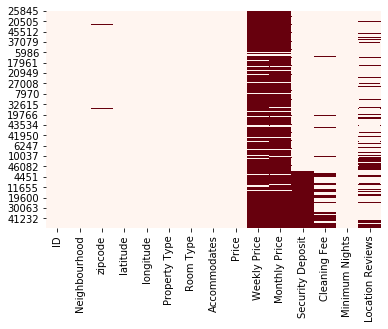

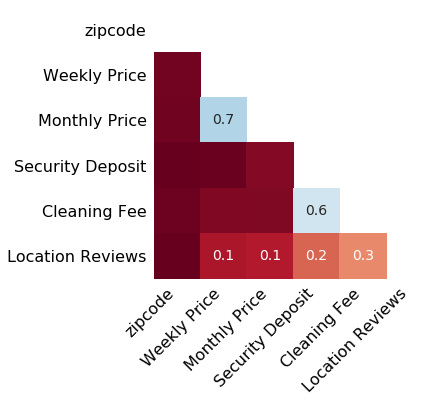

In [25]:
missingValuesHeatmap(Airbnb_data.sort_values('Security Deposit')) 

    Zipcode - the key attribute in our analysis is missing in 50 observations, 21 % of the observations missing Location Reviews. We impute them with KNN Imputation.
    
    Security Deposit and Cleaning Fee are missing by 26% and 14% respectively. Eventhough we do not need them in our analysis because we are not expecting any profit from these attributes. Money collected as security deposit goes to Annual Operating Costs (for respective property) and Cleaning Fee is for its literal purpose. We will impute them with KNN Imputation.



### <span style="color:brown"><center> 2.3 Missing values Imputation </center> </span>

In [26]:
def knnImputation(columns, data):
    
    imputer = KNNImputer(n_neighbors=3, missing_values="NaN")
    X_imputed = imputer.fit_transform(data[columns])

    data[columns]= X_imputed
    
    return data

In [27]:
Airbnb_data = knnImputation(columns = ['latitude', 'longitude', 'zipcode', 'Location Reviews'], data = Airbnb_data)

In [28]:
Airbnb_data = knnImputation(columns = ['latitude', 'longitude', 'zipcode', 
                                       'Security Deposit', 'Cleaning Fee'], data = Airbnb_data)

In [29]:
def convertToString(targetColumn, data):
    
    data.loc[:,targetColumn] = np.array(data.loc[:,targetColumn].apply(lambda x: str(int(x))))
    
    return data

In [30]:
Airbnb_data = convertToString(targetColumn = 'zipcode', data = Airbnb_data)

In [31]:
#Fuction to Fill NA's with meaningful values
def fillMissingValues(targetColumn, feedingColumn, dataframe, constant=0,discountPercentage = 0):
    dataframe[targetColumn] = dataframe[targetColumn].fillna(dataframe[feedingColumn] * constant * (100 - discountPercentage)/100)
    
    return dataframe

In [32]:
fillMissingValues('Weekly Price', 'Price', dataframe = Airbnb_data, constant=7, discountPercentage = 10 )
fillMissingValues('Monthly Price', 'Price', dataframe = Airbnb_data, constant=30.5, discountPercentage = 20 )
fillMissingValues('Security Deposit', 'Price', dataframe = Airbnb_data)
fillMissingValues('Cleaning Fee', 'Price', dataframe = Airbnb_data).head()

,ID,Neighbourhood,zipcode,latitude,longitude,Property Type,Room Type,Accommodates,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Minimum Nights,Location Reviews
19,7750,Manhattan,10029,40.79685,-73.94872,Apartment,Entire home/apt,4,190.0,1197.0,4636.0,483.333333,75.0,7,9.333333
48,13050,Brooklyn,11221,40.68554,-73.94090,Townhouse,Entire home/apt,5,115.0,850.0,2806.0,150.000000,85.0,3,9.000000
52,14290,Brooklyn,11206,40.70420,-73.93560,Loft,Entire home/apt,2,228.0,1436.4,5563.2,350.000000,128.0,3,9.000000
61,15396,Manhattan,10001,40.74623,-73.99530,Apartment,Entire home/apt,4,375.0,2750.0,7500.0,1000.000000,120.0,180,10.000000
62,15711,Manhattan,10162,40.77065,-73.95269,Apartment,Entire home/apt,6,250.0,2000.0,6000.0,500.000000,200.0,2,9.000000


In [33]:
#Checking for Missing values

missingData(Airbnb_data)

,Total,Percent
Location Reviews,0,0.0
Minimum Nights,0,0.0
Cleaning Fee,0,0.0
Security Deposit,0,0.0
Monthly Price,0,0.0
Weekly Price,0,0.0
Price,0,0.0
Accommodates,0,0.0
Room Type,0,0.0
Property Type,0,0.0


In [34]:
Airbnb_data.shape

(6497, 15)

While analysing the data **Zipcode 10013** is present in both Brooklyn and Manhattan. Upon cross checking there is a property in Brooklyn for which this is true but this might be a problem in our future analysis so this perticular observation (as we have only one property in 10013 Brooklyn) is discarded. 

In [35]:
Airbnb_data = Airbnb_data.drop(Airbnb_data[(Airbnb_data['zipcode']=='10013') & 
                                           (Airbnb_data['Neighbourhood']=='Brooklyn')].index)

In [36]:
Airbnb_data.shape

(6496, 15)

<center><span style="color:purple"> Zillow Dataset: </center>

    Let us look into zipcode attribute from Zillow dataset.

In [37]:
zillow_data.dtypes

RegionID          int64
zipcode           int64
City             object
CountyName       object
SizeRank          int64
Property Cost     int64
dtype: object

    Apparently, type of this zipcode attribute is integer which might run us into trouble while analysizing it. So, we better convert this integer attribute to string.

In [38]:
zillow_data = convertToString(targetColumn = 'zipcode', data = zillow_data)

    Now, let us check for missing values in Zillow dataset using missingData fuction.

In [39]:
missingData(zillow_data)

,Total,Percent
Property Cost,0,0.0
SizeRank,0,0.0
CountyName,0,0.0
City,0,0.0
zipcode,0,0.0
RegionID,0,0.0


    There are no missing values in Zillow dataset. We are good to go from here.

###  <span style="color:brown"> <center> 2.4 Wrangling On Price, Weekly Price & Monthly Price </center> </span>

<span style="color:BROWN"> PRICE ATTRIBUTE </span>

    Let's check the range of the price attribute by grouping the data based on Neighbourhood.

In [40]:
#Fuction to give max min of any numeric column by grouping with neighbourhood

def maxmin(targetColumn, dataframe, group='Neighbourhood'):
    
    Maximum = dataframe.groupby(group)[targetColumn].apply(max).reset_index().rename(columns={targetColumn:'Max ' 
                                                                                              + targetColumn})
    
    Minimum = dataframe.groupby(group)[targetColumn].apply(min).reset_index().rename(columns={targetColumn:'Min ' 
                                                                                              + targetColumn})

    return Minimum.set_index(group).join(Maximum.set_index(group))

In [41]:
maxmin(targetColumn='Price', dataframe=Airbnb_data)

,Min Price,Max Price
Neighbourhood,,
Bronx,35.0,425.0
Brooklyn,0.0,5000.0
Manhattan,10.0,9999.0
Queens,25.0,2350.0
Staten Island,48.0,300.0


    Price per night ranges from 0$  -  9,999$ which needs to be analysed and corrected by filtering abnormalities. Simplest way to check for abnormalities is by looking at boxplots. Let's do that.

In [42]:
# Function to to plot group boxplot for better visualization:

def groupBoxPlot(targetColumn, dataframe, groupBy='Neighbourhood', ylimit=5000):
    
    borough = dataframe[groupBy].unique()
    df = pd.DataFrame(columns=['Neighbourhood', targetColumn])
    
    for i in borough:
        borough_df = pd.DataFrame({'Neighbourhood' : np.repeat(i, dataframe[dataframe[groupBy] == i].loc[:,
                                    targetColumn].count()), targetColumn: dataframe[dataframe[groupBy] == i].loc[:,
                                                                                                    targetColumn] })
        
        
        df = df.append(borough_df)
        
    
# Usual boxplot with limit on Y axis

    f, ax = plt.subplots(figsize=(8, 8))
    plt.xticks(rotation='90')
    sns.set(style="whitegrid")
    plt.ylim(0,ylimit)
    
    plt.title(targetColumn + ' BoxPlot', fontsize=20)
    return sns.boxplot(x=df[groupBy], y=df[targetColumn] ,data=df)
            
    

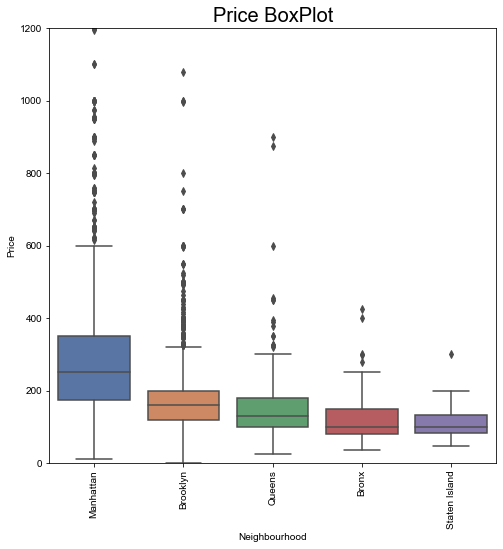

In [43]:
groupBoxPlot(targetColumn= 'Price',dataframe = Airbnb_data, ylimit=1200)

    With the help of boxplots we tend to say that there are ouliers in attribute Price, but upon scrutinized analysis on these observations I can conclude that there exist a possibility of very high pricing (apparently for luxuries/ amenities) in certain areas. Even though they are not abnormalities but including them in our analysis may result in a biased conclusions. So, we better remove them and leave them for future scope.


    The better stategy to remove them would be with standard deviation, we can discard the observations which are more than 2 standard deviations away from the mean.

In [44]:
#Simple explanation of the code is commented below:
#df_borough = data[ Neighbourhood = borough] & price < mean (price in this borough) - 2 * std (price in this borough)
#                                            & price > mean (price in this borough) + 2 * std (price in this borough)
def discardAbnormalities(targetColumn, data, groupBy='Neighbourhood'):
    
    borough = data[groupBy].unique()
    
    df = pd.DataFrame(columns=data.columns)
    
    for i in borough:
        
        borough_df = data[(data.loc[:,groupBy] == i) & 
                    (data.loc[:,targetColumn] > (data[data[groupBy] == i].loc[:,targetColumn].mean() - 
                    2 * stdev(data[data[groupBy] == i].loc[:,targetColumn]))) & 
                    (data.loc[:,targetColumn] < data[data[groupBy] == i].loc[:,targetColumn].mean() + 
                    2 * stdev(data[data[groupBy] == i].loc[:,targetColumn]))]
        
        df = df.append(borough_df)
    
    return df

In [45]:
Airbnb_data = discardAbnormalities(targetColumn= 'Price', data=Airbnb_data)

In [46]:
maxmin('Price', dataframe=Airbnb_data)

,Min Price,Max Price
Neighbourhood,,
Bronx,35.0,250.0
Brooklyn,0.0,550.0
Manhattan,10.0,1000.0
Queens,25.0,395.0
Staten Island,48.0,180.0


    With strategically discarding some observations to see significant change in min and max price. But still price per night for $ 0 is disturbing. As this observation will not yield any profit for the real estate company we simply remove it from our analysis.

In [47]:
#Deleting price = 0 observation(s)
Airbnb_data = Airbnb_data[Airbnb_data.Price != 0]

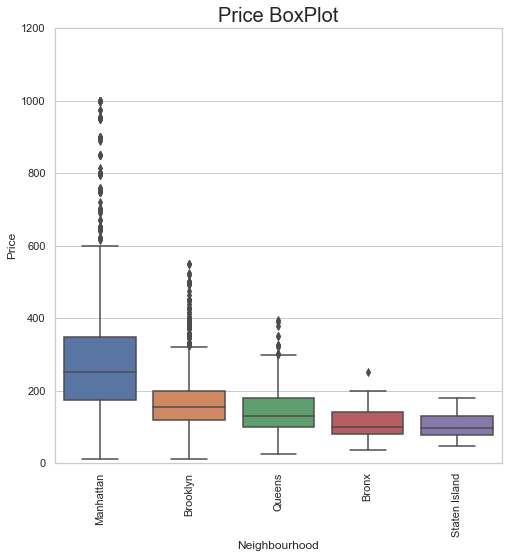

In [48]:
groupBoxPlot('Price', ylimit=1200, dataframe=Airbnb_data)

The above boxplot clearly says that the **Quality of our data** is greatly improved.

<span style="color:BROWN"> WEEKLY PRICE  & MONTHLY PRICE </span>

    Now let us move on to wrangling on Weekly and Monthly Price. Fuctions were already created we just need to use them here.

In [49]:
Airbnb_data = discardAbnormalities(targetColumn='Weekly Price', groupBy='Neighbourhood', data=Airbnb_data)
Airbnb_data = discardAbnormalities(targetColumn='Monthly Price', groupBy='Neighbourhood', data=Airbnb_data)

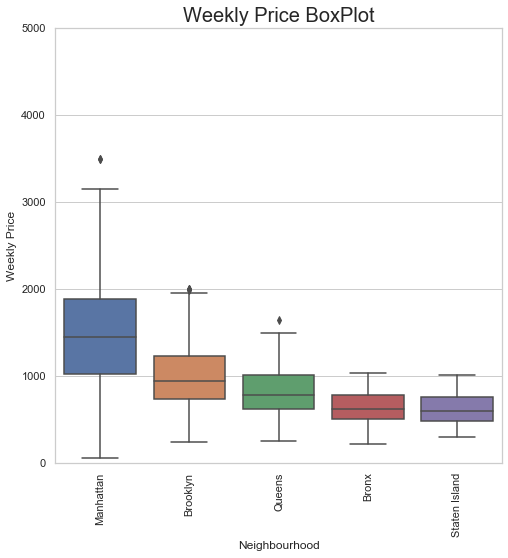

In [50]:
groupBoxPlot('Weekly Price',  dataframe = Airbnb_data)

###  <span style="color:brown"> <center> 2.5. Wrangling On Security Deposit & Cleaning Fee </center> </span>

<span style="color:BROWN"> SECURITY DEPOSIT ATTRIBUTE </span>

1. Security Deposit and Cleaning Fee are charged by the hosts for maintenance.


2. Any abnormalities in these attributes will not effect our analysis, but setting upper limit will result in homogeneity.

In [51]:
def setRight(data, targetColumn, groupBy='Neighbourhood'):
    
    borough = data[groupBy].unique()
    
    df = pd.DataFrame(columns=data.columns)
    
    for i in borough:
        
        upperLimit = data[data.loc[:,groupBy] == i][targetColumn].mean() + 2 * (stdev(data[data.loc[:,groupBy] == i][targetColumn]))
        borough_df = data[data.loc[:,groupBy] == i]
        borough_df[targetColumn][borough_df[targetColumn] >= upperLimit] = upperLimit
        
        df = df.append(borough_df)
    return df

In [52]:
Airbnb_data = setRight(data=Airbnb_data, targetColumn='Security Deposit', groupBy='Neighbourhood')

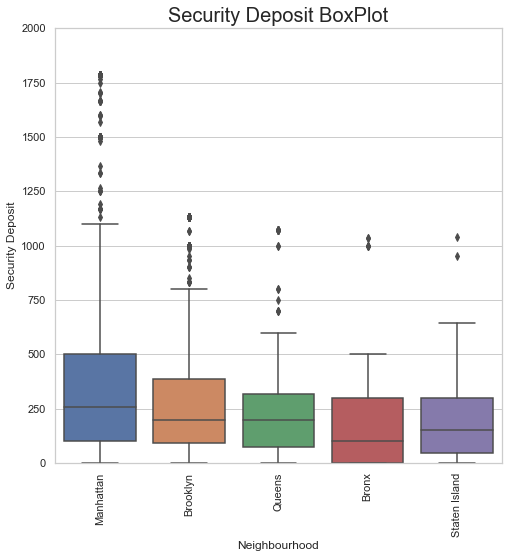

In [53]:
groupBoxPlot(targetColumn='Security Deposit', ylimit=2000,  dataframe=Airbnb_data)

In [54]:
Airbnb_data.shape

(5814, 15)

<span style="color:BROWN"> **CLEANING FEE ATTRIBUTE** </span>

In [55]:
Airbnb_data = setRight(data=Airbnb_data, targetColumn='Cleaning Fee', groupBy='Neighbourhood')

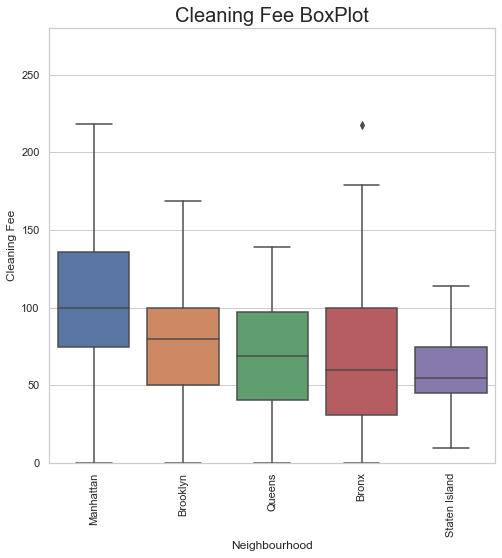

In [56]:
groupBoxPlot(targetColumn='Cleaning Fee', ylimit=280, dataframe=Airbnb_data)

<center><span style="color:purple"> Zillow Dataset: </center>

In [57]:
sum(zillow_data.zipcode.value_counts())

25

In [58]:
Airbnb_data.zipcode.describe()

count      5814
unique      167
top       11211
freq        283
Name: zipcode, dtype: object

## <span style="color:green">  <center> 3. DATA ANALYSIS  </center> </span>

###  <span style="color:brown"> <center> 3.1. Analysis on Zipcode </center>

    First things first, let us observe number of unique zipcodes in each Neighbourhood. 

In [59]:
Airbnb_data.shape

(5814, 15)

In [60]:
#Looking at variety of options (zipcodes) to invest in each neighbourhood
def uniqueOf(uniqueInGroupCol, groupbyCol='Neighbourhood', data=Airbnb_data):
    
    data_group = data.groupby(groupbyCol)[uniqueInGroupCol].nunique()
    
    
    return pd.DataFrame(data_group).sort_values(uniqueInGroupCol).plot(kind='pie', subplots=True, figsize=(8,8), 
                            title="Unique " + uniqueInGroupCol +'s in each ' + groupbyCol + ' (Total = ' + str(
                                                         data[uniqueInGroupCol].nunique()) + " )",
                            autopct=lambda x : '{:.2f}%  ({:,.0f})'.format(x, x * sum(data_group)/100))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd93748>],
      dtype=object)

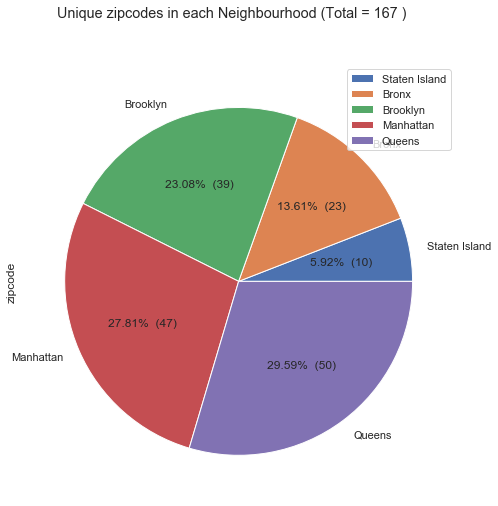

In [61]:
uniqueOf('zipcode')

    Now that we know the count of unique zipcodes and their spread in each neighbourhood. Let us look at total number of properties in each neighbourhood.


    For that first let us create a function totalNumberOf() which takes column name(on which you are grouping, here it is Neighbourhood). This fuction will group the zipcodes with respect to their borough and returns pie chart.

In [62]:
#Looking at number of properties in each zipcode from the data

def totalNumberOf(groupBy='Neighbourhood', data = Airbnb_data):
    
    return data[groupBy].value_counts().plot(kind='pie', subplots=True, figsize=(8,8), 
                                            title="Number of Observations in each " + groupBy,
                autopct=lambda x : '{:.2f}%  ({:,.0f})'.format(x, x * sum(data[groupBy].value_counts())/100))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c3e1c50>],
      dtype=object)

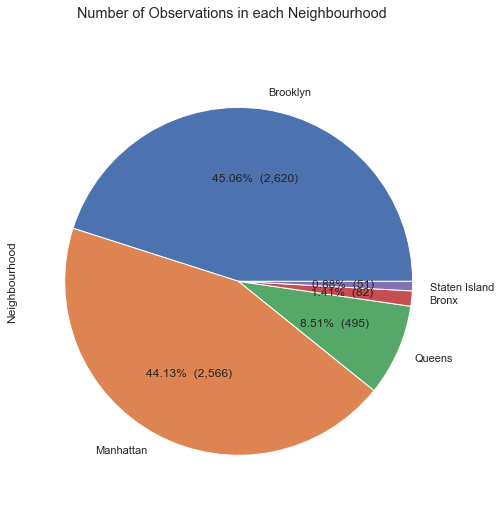

In [63]:
totalNumberOf()

    Manhattan and Brooklyn share almost 90% of the graph.
    
    Now let us look into the zipcodes that have most number of properties.

    For that we create a function topInNeighbourhood() which takes the limit as top(for ex: if we need top 100 zipcodes we give top = 100) and segregation column name. For easy visualization this function returns pie chart which is grouped based on borough.

In [64]:
def topInNeighbourhood(top, ordered, column, data, groupBy= 'Neighbourhood'):
    df_top = data.groupby([groupBy, column])[column].agg(
                            {"# Properties": len}).sort_values("# Properties", ascending=False).head(top).reset_index()
    print(df_top.head())
    f, ax = plt.subplots(figsize=(15, 8))
    plt.xticks(rotation='90')
    sns.set(style="whitegrid")
    plt.title('Number of properties in each '+ column + ' grouped by ' + groupBy, fontsize=20)
    order=df_top.sort_values('# Properties')[column]
    
    if ordered=='Yes': 
        ordered=df_top.sort_values('# Properties')[column]
        
    else:
        ordered=None
        
    return sns.barplot(x=order, y=df_top['# Properties'], hue=df_top.Neighbourhood, order=ordered)
    

Function is ready and let us look into top 50 zipcodes along with their property count.

  Neighbourhood zipcode  # Properties
0      Brooklyn   11211           283
1      Brooklyn   11221           251
2      Brooklyn   11216           178
3      Brooklyn   11215           175
4      Brooklyn   11222           169


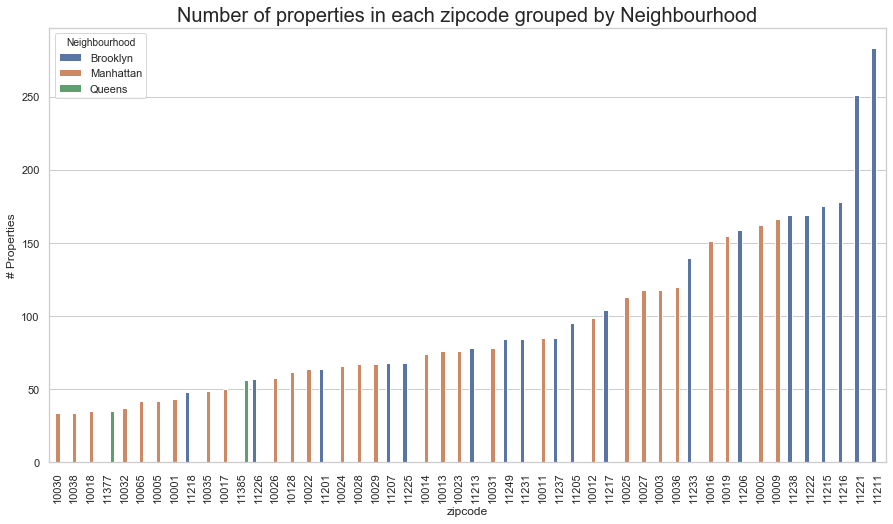

In [65]:
topInNeighbourhood(top=50, column='zipcode', ordered='Yes', data = Airbnb_data)

**Conclusions:**

1. There are 167 unique zipcodes collected from all 5 borough's, which is pretty good as there are only 178 zipcodes and 5 borough's in New york City.


2. Almost 90% of the observations in Airbnb data are collected from Manhattan and Brooklyn and if we include Queens it makes 98%. So, our conclusions and insights can/will be more focused on these perticular areas and will try to draw conclusions on other borough's as much as possible.


3. Not surprisingly most number of properties are from Manhattan and Brooklyn in top 50 zipcodes. Top 5 zipcodes (with most number of properties) are from Brooklyn and heighest number of properties are in:  **zipcode - 11211, Brooklyn.**

**Next step:**

We know about zipcodes, properties and their spread in each Neighbourhood, now its time to look deep into **Property Type**


###  <span style="color:brown"> <center> 3.2. Analysis on Property Type </center>

    Let us visualize the count of each property.

In [66]:
Airbnb_data['Property Type'].value_counts()

Apartment             4664
House                  349
Condominium            281
Townhouse              208
Loft                   159
Serviced apartment      57
Guest suite             44
Other                   13
Guesthouse               7
Bed and breakfast        6
Bungalow                 5
Boutique hotel           5
Resort                   5
Cabin                    3
Villa                    2
Cave                     1
Cottage                  1
Yurt                     1
Houseboat                1
Aparthotel               1
Camper/RV                1
Name: Property Type, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ea576d8>],
      dtype=object)

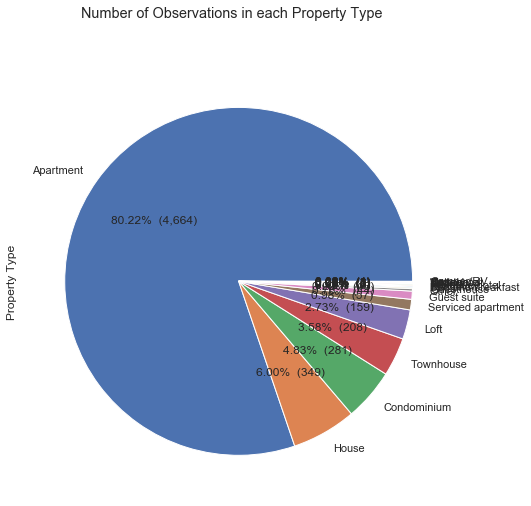

In [67]:
totalNumberOf(groupBy='Property Type', data = Airbnb_data)

    Major share is from Apartment.

    Bungalow, Guesthouse, Bed and breakfast, Boutique hotel, Cottage, Cabin, Villa, Boat, Camper/RV, Aparthotel, Yurt, Houseboat, Cave, Hotel are all with less than 10 observations each.

    Furthermore topInNeighbourhood() fuction helps us to visualize the spread of these properties in each Neighbourhood. 

  Neighbourhood Property Type  # Properties
0     Manhattan     Apartment          2254
1      Brooklyn     Apartment          2032
2        Queens     Apartment           311
3      Brooklyn         House           179
4      Brooklyn     Townhouse           150


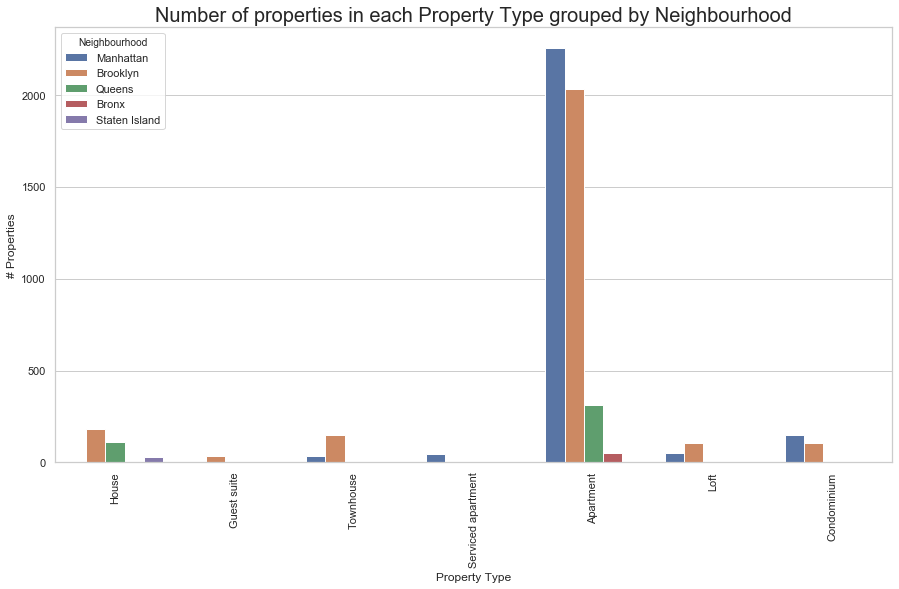

In [68]:
topInNeighbourhood(top=15 ,ordered='No', column='Property Type', data = Airbnb_data)

What would be the price per night in these properties?

    To visualize that we build plot() function which takes kind(bar/ scatter), xColumn ~ grouping column, yColumn ~ column of our interest, title ~ graph title and data ~ dataframe. This function gives a clear plot which is grouped by our grouping column.

In [69]:
def plot(xColumn, yColumn, kind, data=Airbnb_data, order=None):
    df = data.groupby([xColumn]).mean().sort_values(yColumn)
    
    f, ax = plt.subplots(figsize=(8, 8))
    plt.xticks(rotation='90')
    sns.set(style="whitegrid")

    if kind =='bar':
        plt.title('Average ' + yColumn + ' in each ' + xColumn , fontsize=20)
        return sns.barplot(x=df.index, y=df[yColumn], order=order)
    elif kind =='scatter':
        plt.title('Average ' + yColumn + ' of each ' + xColumn , fontsize=20)
        return sns.scatterplot(x=df.index, y=df[yColumn], hue=df.index, s=300)

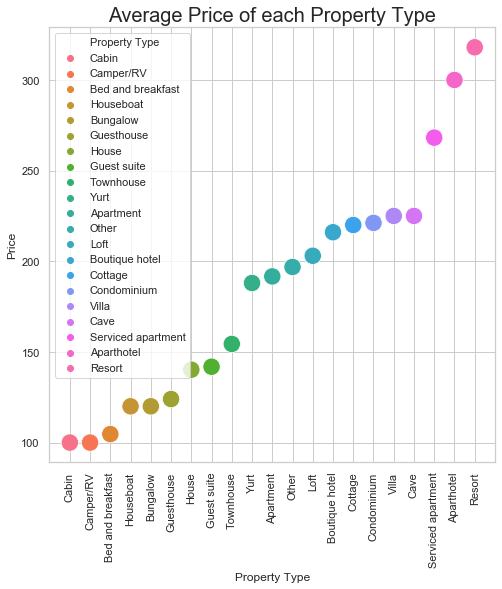

In [70]:
plot( kind='scatter', xColumn='Property Type', yColumn='Price')

**Conclusions:**

1. There are 23 Unique properties in our data.


2. Almost 80% of our properties are Appartments and their average price is around $200.


3. These apartments are majorly from Manhattan and Brooklyn.


4. Most expensive property (with more than 10 observation) to stay in would be Service Apartment followed by loft and the cheapest property (with more than 10 observation) to stay in would be a Guest Suite. This means by keeping the unknown attribute occupancy aside more income can be generated from Service Apartment & loft when compared to Guest Suite.

**Key conclusion:** 

Major properties like Apartment, House, Condominium, loft and Town house are all in the range of doller 150 to $300. Apparently these properties might have high demand in NYC.


**Next step:**

This far we know the hottest properties in NYC and their price range so this is the right time to look for people preference in renting i.e... we will look into Room Type Attribute and try to traw some meaningful insights from it.

###  <span style="color:brown"> <center> 3.3. Analysis on Room Type </center>

    Let us look into different type of option in Room Type form the data.

In [71]:
Airbnb_data[ 'Room Type'].value_counts()

Entire home/apt    5287
Private room        527
Name: Room Type, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a242bb978>],
      dtype=object)

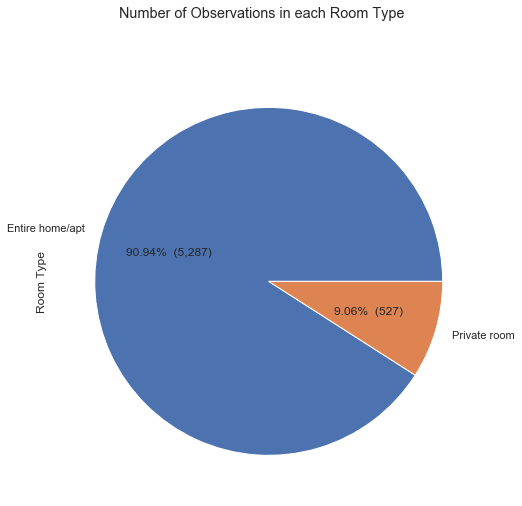

In [72]:
totalNumberOf(groupBy='Room Type', data = Airbnb_data)

    There are only 2 options available and majority of them are entire home. This is not an influential factor in finding best zipcode(s) which generate most profit on short term rentals within New York City. So, We proceed further.

**Next Step:**

   Let us deep dive into Neighbourhood and analyze and draw some useful insights for our end goal.

###  <span style="color:brown"> <center> 3.4. Analysis on Neighbourhood</center>

    Below is the gist on Neighbourhood by taking mean of each attribute grouped by Neighbourhood. We will visualize all of these later in this section.

In [73]:
df_Neighbourhood = Airbnb_data[['Neighbourhood', 'Accommodates','Price', 'Weekly Price', 'Monthly Price',
                                'Security Deposit', 'Cleaning Fee',  
                                'Location Reviews']].groupby(['Neighbourhood']).mean().sort_values('Price')

df_Neighbourhood

,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Location Reviews
Neighbourhood,,,,,,
Staten Island,98.686275,617.196078,2394.137255,206.277879,58.613728,9.477124
Bronx,101.792683,635.300000,2421.485366,196.194225,67.095510,9.357724
Queens,129.094949,814.394747,3142.531717,231.766473,66.555077,9.406734
Brooklyn,155.832061,977.465191,3731.857634,266.683863,80.451453,9.480280
Manhattan,239.468433,1512.042790,5784.230553,403.178682,105.135331,9.675500


    Let us visualize the average price in each neighbourhood.

    For this we can use plot() function which is already been created by just giving Neighbourhood column instead of Property Type.

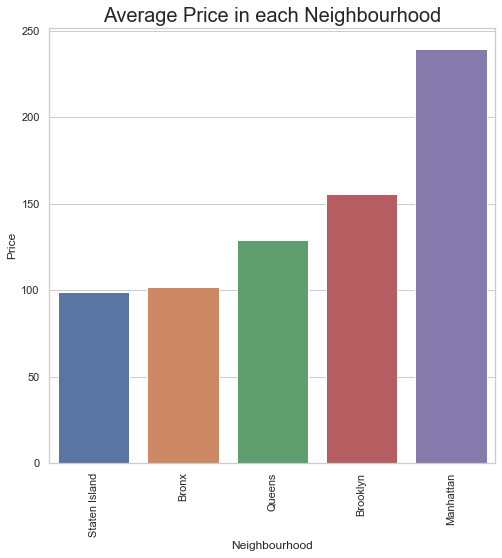

In [74]:
plot( kind='bar', xColumn='Neighbourhood', yColumn='Price')

    We can see that Manhatten is the most expensive place to stay in. Staten Island is least expensive.

    Let us see how well people like the neighbourhood, for this we got  'Location Reviews' on hand and we just need into pass this 'Location Reviews' column to plot() function which is already created.

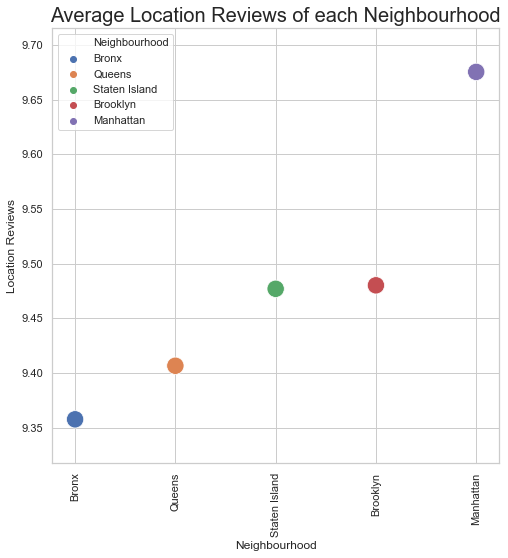

In [75]:
plot( kind='scatter', xColumn='Neighbourhood', 
     yColumn='Location Reviews')

    Although ratings range from 9.35 to 9.7, Manhatten is the most liked place for a stay in NYC and Bronx is the least rated place.

**Conclusions:**

1. Average price of the properties in Manhatten is 170% more than average price in Staten Islands that means Manhattan is the most profitable place to rent a property as Return of Investment will be high.


2. Even though average price quoted for the properties in Manhattan is higher than the rest of the borough's people like staying in Manhatten which is evidently proved from 'Average Review rating for Neibhourhood' plot.


###  <span style="color:brown"> <center> 3.5. Analysis on Zillow Dataset: </center>

    Let us see number of unique zipcodes in Zillow dataset.

In [76]:
zillow_data.zipcode.value_counts()

11201    1
10303    1
10013    1
11231    1
11234    1
10022    1
11217    1
10028    1
10023    1
10314    1
10025    1
10308    1
10014    1
10312    1
10021    1
11434    1
10304    1
11215    1
10306    1
10003    1
10309    1
10128    1
10305    1
10011    1
10036    1
Name: zipcode, dtype: int64

In [77]:
len(zillow_data.zipcode.value_counts())

25

    There are 25 unique zipcodes in Zillow data. Let us visualize property cost.

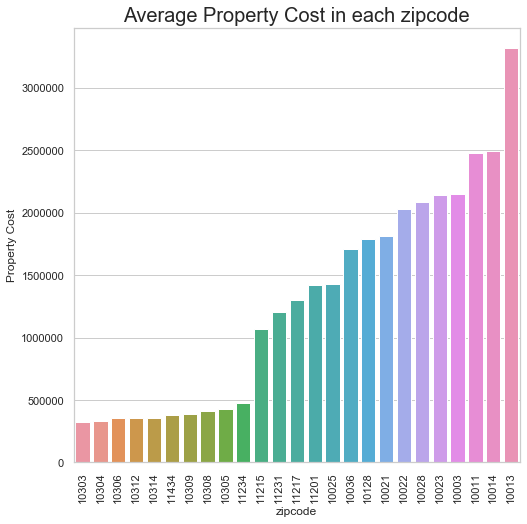

In [78]:
order= zillow_data.sort_values('Property Cost')['zipcode']
plot( kind='bar', xColumn='zipcode', order=order,
     yColumn='Property Cost', data=zillow_data)

From the above graph we conclude that properties in area with **zipcode: 10013 is most expensive** and properties in area with **zipcode: 10303 is the cheapest**.

In [79]:
#f, ax = plt.subplots(figsize=(8, 8))
#plt.xticks(rotation='90')
#sns.set(style="whitegrid")
#plt.title('Size ranking of properties in respective Zipcode', fontsize=20)
#sns.barplot(x='zipcode', y=1/zillow_data.SizeRank ,data=zillow_data, order=order)

zillow_data[['zipcode','SizeRank']]

,zipcode,SizeRank
0,10025,1
2,10023,3
13,10128,14
14,10011,15
20,10003,21
31,11201,32
51,11234,52
67,10314,68
70,11215,71
108,10028,109


From above two we can visualize and conclude that zipcode **10025 is the biggest** and **zipcode 10303 is the smallest**.

**Conclusion:**


1. Zipcodes (10303, 10304, 10305, 10306, 10308, 10309, 10312, 10314, 11234, 11434) are least expensive ranging from dollar 300k to 500k  and zipcodes (10021, 10025, 10036, 10128, 11201, 11215, 11217, 11231) are moderately expensive ranging from dollar 1 Million to  2 Million and zipcodes  (10003, 10011, 10013, 10014, 10022, 10023, 10028) are the most expensive areas with prices ranging from dollar 2 Million to 4 Million.


2. Area with zipcode 10025 is the largest and moderately expensive and 10303 is the smallest and least expensive.


**Next Step**

Up until now we analysed Airbnb data and Zillow data seperately and noted some meaningful insighs towords our end goal. Now, this is the time where we need to join these two datasets inorder to measure profitability and get a complete picture.

##  <span style="color:green"> <center>  4. Joining Zillow and Airbnb </center>

From the above analysis we noted few points that:


1. Unique zipcodes in Airbnb data - 174


2. Unique zipcodes in Zillow data - 25


So, we dont have property estimation for all the zipcodes in New York City. But, we have 25 areas property estimation. This is a good start. Let us merge these.

In [80]:
#Function to join Airbnb and Zillow datasets

def joinDataFrames(dataFrame1, dataFrame2, columnsInDataFrame1, columnsInDataFrame2, indexColumn):
    
    
    mergedDF = dataFrame1[columnsInDataFrame1].set_index(indexColumn).join(dataFrame2
                                                                    [columnsInDataFrame2].set_index(indexColumn))
    
    mergedDF.reset_index(level=0, inplace=True)
    return mergedDF

In [81]:
columns1 = ['Neighbourhood', 'zipcode' ,'Property Type','latitude', 'longitude',
                        'Accommodates' ,'Price','Weekly Price', 'Monthly Price', 'Location Reviews','Security Deposit', 
                       'Cleaning Fee','Minimum Nights', 'Room Type', ]

columns2 = [ 'Property Cost', 'zipcode']

ZillownBnb = joinDataFrames(dataFrame1 = Airbnb_data, dataFrame2 = zillow_data , columnsInDataFrame1= columns1,
               columnsInDataFrame2 = columns2, indexColumn = 'zipcode')


Checking for the missing values in our new dataframe **ZillownBnb** from our old function **missingData**

In [82]:
missingData(ZillownBnb)

,Total,Percent
Property Cost,4458,76.676987
Room Type,0,0.000000
Minimum Nights,0,0.000000
Cleaning Fee,0,0.000000
Security Deposit,0,0.000000
Location Reviews,0,0.000000
Monthly Price,0,0.000000
Weekly Price,0,0.000000
Price,0,0.000000
Accommodates,0,0.000000


    As expected almost 77% of the areas doesn't have property estimation. However, in order to achieve our goal we need to estimate property costs of all these areas.


    We need to come up with some strategy.

    How about estimating the property cost of a missing zipcode from its nearest neighbour?

    In this strategy for any missing (property) cost we check for it's nearest neighbour and assign the mean (property) cost to the missing value. This way we will be in better position to analyse and predict the most profitable location. This strategy perticularly interests me because in real estate many times valuation of plots are highly correlated to its location.

**KNN Imputation**

In [83]:
imputer = KNNImputer()
X_imputed = imputer.fit_transform(ZillownBnb[['latitude', 'longitude', 'Price','Location Reviews',
                                              'Security Deposit', 'Cleaning Fee', 'Property Cost' ]])

ZillownBnb[['latitude', 'longitude', 'Price','Location Reviews',
            'Security Deposit', 'Cleaning Fee', 'Property Cost' ]]= X_imputed


In [84]:
ZillownBnb.head()

,zipcode,Neighbourhood,Property Type,latitude,longitude,Accommodates,Price,Weekly Price,Monthly Price,Location Reviews,Security Deposit,Cleaning Fee,Minimum Nights,Room Type,Property Cost
0,10001,Manhattan,Apartment,40.74623,-73.99530,4,375.0,2750.0,7500.0,10.0,1000.000000,120.0,180,Entire home/apt,2283540.0
1,10001,Manhattan,Apartment,40.75114,-74.00195,4,350.0,2205.0,8540.0,9.0,500.000000,130.0,3,Entire home/apt,1866400.0
2,10001,Manhattan,Loft,40.74664,-73.99441,5,399.0,2513.7,9735.6,10.0,1500.000000,175.0,3,Entire home/apt,2147820.0
3,10001,Manhattan,Apartment,40.74658,-73.98847,6,115.0,724.5,2806.0,10.0,100.000000,100.0,2,Entire home/apt,1066400.0
4,10001,Manhattan,Apartment,40.74611,-73.99209,4,295.0,1858.5,8000.0,9.0,116.666667,110.0,30,Entire home/apt,2360760.0


    Let's do Quality check on the data by checking amount of missing data in our ZillownBnb.

In [85]:
missingData(ZillownBnb)

,Total,Percent
Property Cost,0,0.0
Room Type,0,0.0
Minimum Nights,0,0.0
Cleaning Fee,0,0.0
Security Deposit,0,0.0
Location Reviews,0,0.0
Monthly Price,0,0.0
Weekly Price,0,0.0
Price,0,0.0
Accommodates,0,0.0


    Now, let us visualize cost of a property in each neighbourhood.

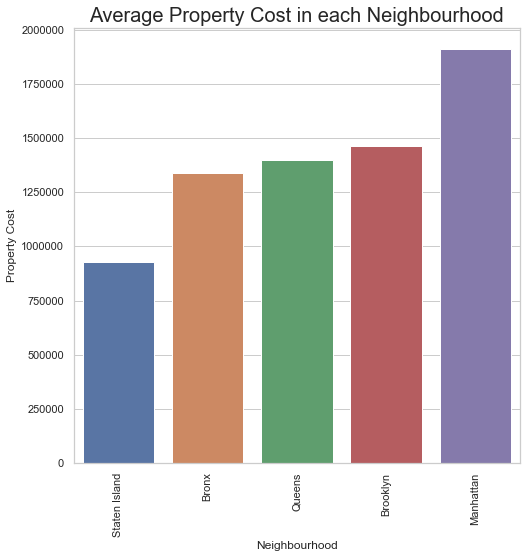

In [86]:
plot(data= ZillownBnb, kind='bar', xColumn='Neighbourhood', yColumn='Property Cost')

    Getting a property in Manhattan is more expensive and in Staten Island is least expensive.

In [87]:

# import street map, I got shp file from below website
 #https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
    
NYC_map = gpd.read_file('geo_export_fa205e3d-16cc-411e-b2fb-8b3aa14781cb.shp')

In [88]:
crs = {'init':'espc:4326'}
geometry = [Point(xy) for xy in zip(ZillownBnb['longitude'], ZillownBnb['latitude'])]
geo_df = gpd.GeoDataFrame(ZillownBnb, crs = crs, geometry = geometry)

In [89]:
def locationMapOn(attribute1, attribute2, data=geo_df):

    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,15))
    ax1.set_title('Average ' + attribute1 + ' distribution in NYC')
    NYC_map.plot(ax=ax1, alpha=0.4,color='grey')
    data.plot(column=attribute1, ax=ax1, alpha=0.3,  markersize=5, figsize=(10,10), 
                legend=True)

    ax2.set_title('Average ' + attribute2 + ' distribution in NYC')
    NYC_map.plot(ax=ax2, alpha=0.4,color='grey')
    data.plot(column=attribute2, ax=ax2, alpha=0.3,  markersize=5, figsize=(10,10), legend=True)

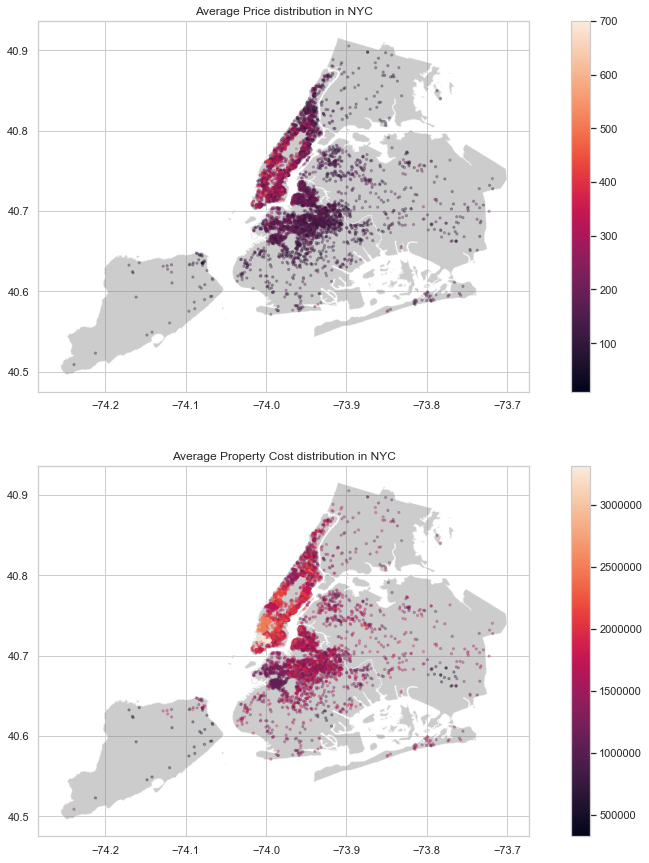

In [90]:
geo_df = gpd.GeoDataFrame(ZillownBnb, crs = crs, geometry = geometry)
locationMapOn(attribute1='Price', attribute2='Property Cost', data=geo_df)

In [91]:
ZillownBnb.shape

(5814, 16)

##  <span style="color:green"> <center> 5. Model Building & Analysis </center>

Our end goal as stated in the begenning of this project is to help real estate company understand which zipcodes would generate the most profit on short-term rentals within New York City. So, after this short term that property will be sold. Assuming the discount factor to be 0%.


    We need to build a model which can accurately predict if the property is profitable or not. In order to build such a model we need:
    
            1. AnnualRevenue, annual revenue generated by a property, which can be calculated by multiplying number of days to Price with 75% occupancy rate(assumed to be same for all properties).
    
                        AnnualRevenue = Occupancy * Price * 365 
                        
            2. AnnualOperatingCost, this is referred as annual maintenance for a property, usually this will be taken care by cleaning fee and security deposit but in general it is assumed to be on an average 10% of additional cost is dedicated to operating costs.

                        AnnualOperatingCost = 0.1 * AnnualRevenue
                        
            3. AnnualProfit, is calculated by subtracting AnnualOperatingCost from AnnualRevenue.
            
                        AnnualProfit = AnnualRevenue - AnnualOperatingCost

**BreakEvenPeriod:**
    
    Break Even Period says by howmany years a property is expected to pay off its investments.
            
                        BreakEvenPeriod = Investment / AnnualProfit

**ROI : Return On Investment.**


    Along with Break Even Period, ROI is good metric to measure profits. ROI can be defined as a ratio between net profit and cost of investment over certain period of time. A high ROI means the investment's gains compare favorably to its cost.

                                    ROI = AnnualProfit / Investment

In [92]:
def annualRevenueCalculation(data, newColumn):
    for i in data.index:
        if data.loc[i, 'Minimum Nights'] < 7:
            data.loc[i, newColumn] = data.loc[i, 'Price'] * 0.75 * 365
        
        elif 7 < data.loc[i, 'Minimum Nights'] < 30:
            data.loc[i, newColumn] = data.loc[i, 'Weekly Price'] * 0.75 * 365 / 7
        
        else:
            data.loc[i, newColumn] = data.loc[i, 'Monthly Price'] * 0.75 * 365 / 31
    

In [93]:
#Annual Revenue
annualRevenueCalculation(ZillownBnb, 'AnnualRevenue' )

#AnnualOperatingCost 
ZillownBnb.loc[ : , 'AnnualOperatingCost'] = ZillownBnb['AnnualRevenue'] * 0.1

#AnnualProfit
ZillownBnb.loc[ : , 'AnnualProfit'] = ZillownBnb['AnnualRevenue'] - ZillownBnb['AnnualOperatingCost']

#Break Even Period
ZillownBnb.loc[ : , 'BreakEvenPeriod'] = ZillownBnb['Property Cost'] / ZillownBnb['AnnualProfit']

#ROI
ZillownBnb.loc[ : , 'ROI'] = 100  * ZillownBnb['AnnualProfit'] / ZillownBnb['Property Cost']

In [94]:
def showBestZipcodes(top, data, columns1, columns2, groupBy, attribute1, attribute2):

    df1 = data.groupby([groupBy]).mean().sort_values(attribute1).head(top)   
    df1.reset_index(level = 0, inplace = True)
    
    df2 = joinDataFrames(df1, data, columns1, columns2, indexColumn = groupBy)
    df2.reset_index(level = 0, inplace = True)
    df2 = df2.drop_duplicates('zipcode')
    
    order = df2.sort_values(attribute1)[groupBy]
    
    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
    ax1.set_title('Top ' + str(top) + '  Zipcodes with respect to ' + attribute1 + '  in NYC')
    sns.barplot(x = order, y = df2[attribute1], ax=ax1, hue = df2.Neighbourhood)
    
    plt.xticks(rotation = '0')
    sns.set(style = "whitegrid")


    df1 = data.groupby([groupBy]).mean().sort_values(attribute2).tail(top) 
    df1.reset_index(level = 0, inplace = True)
    
    df2 = joinDataFrames(df1, data, columns1, columns2, indexColumn = groupBy)
    df2.reset_index(level = 0, inplace = True)
    df2 = df2.drop_duplicates('zipcode')
    
    order = df2.sort_values(attribute2)[groupBy]
    
    ax2.set_title('Top ' + str(top) + ' Zipcodes with respect to ' + attribute2 + '  in NYC')
    sns.barplot(x = order, y = df2[attribute2], ax=ax2, hue = df2.Neighbourhood)
    
    plt.xticks(rotation = '0')
    sns.set(style = "whitegrid")
    print(np.array(order))

['11215' '10036' '10025' '10017' '10007' '10005' '10314' '10309' '10305'
 '10304' '10308' '11234' '11434' '10303' '10306']


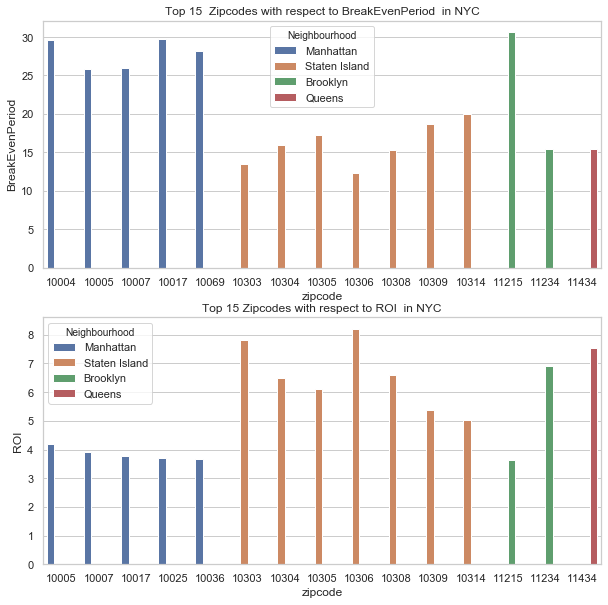

In [95]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']
    
columns2 = ['Neighbourhood', 'zipcode']

showBestZipcodes(15, ZillownBnb, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

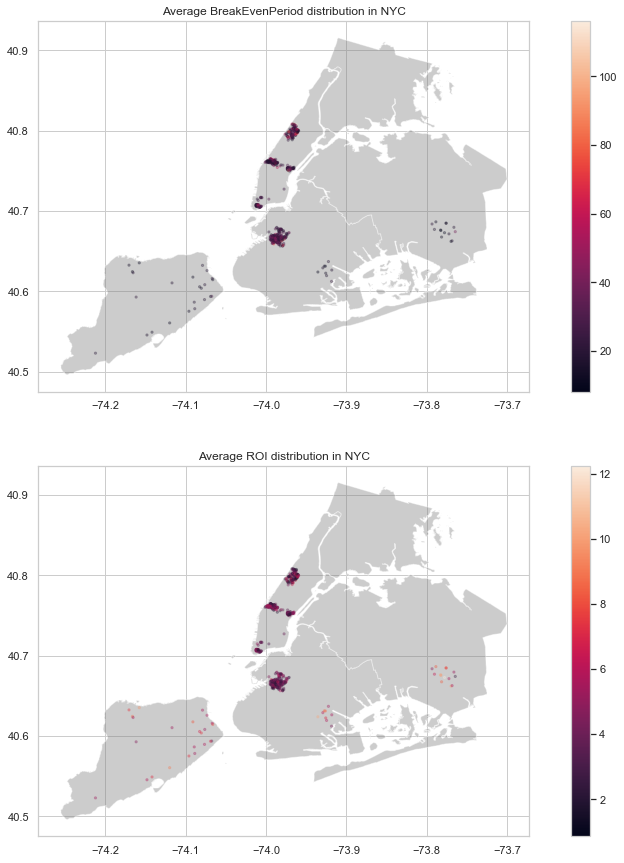

In [96]:
d1 = ZillownBnb.loc[ZillownBnb.zipcode.isin(['11215', '10036', '10025', '10017', '10007', '10005', '10314', '10309',
                                             '10305', '10304', '10308', '11234', '11434', '10303', '10306'])]

geometry = [Point(xy) for xy in zip(d1['longitude'], d1['latitude'])]

geo_df = gpd.GeoDataFrame(d1, crs = crs, geometry = geometry)

locationMapOn(attribute1='BreakEvenPeriod', attribute2='ROI', data=geo_df)

**Conclusions:**


1. The best 15 Zipcodes in general are  '11215', '10036', '10025', '10017', '10007', '10005', '10314', '10309', '10305', '10304', '10308', '11234', '11434', '10303', '10306'.


2. Staten Islands and Manhattan neighbourhoods are best in investing when considered Break Even Period and ROI.


3. Manhattan has the most lucrative zipcodes because Annual Revenue in this borough is high.


4. Staten Islands are inexpensive in buying a property, therefore more profits and even faster Break Even Periods.


5. Bronx is not recommended as it is neither promising for a faster Break Even nor greater ROI.

**Next Step:**

Up until now number of properties in a zipcode is not taken into consideration as we cannot accurately comment on areas with less than certain threshold number of properties. **Below Analysis is only to the zipcodes which have greater than or equal to 5 properties** listed in the dataset.

In [97]:
greaterThan10 = Airbnb_data.groupby(['zipcode'])['zipcode'].agg({"# Properties": len}).sort_values("# Properties").reset_index()
greaterThan10 = greaterThan10[greaterThan10['# Properties']>4]

In [98]:
columnsInDataFrame2 = ['zipcode', 'Neighbourhood', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']

FinalGreater10 = joinDataFrames(dataFrame1=greaterThan10, dataFrame2=ZillownBnb, columnsInDataFrame1=['zipcode', '# Properties'],
               columnsInDataFrame2 = columnsInDataFrame2, indexColumn='zipcode')

In [99]:
FinalGreater10.shape

(5688, 9)

['10010' '10018' '10001' '10012' '11231' '10004' '11215' '10036' '10025'
 '10017' '10007' '10005' '10305' '11234' '11434']


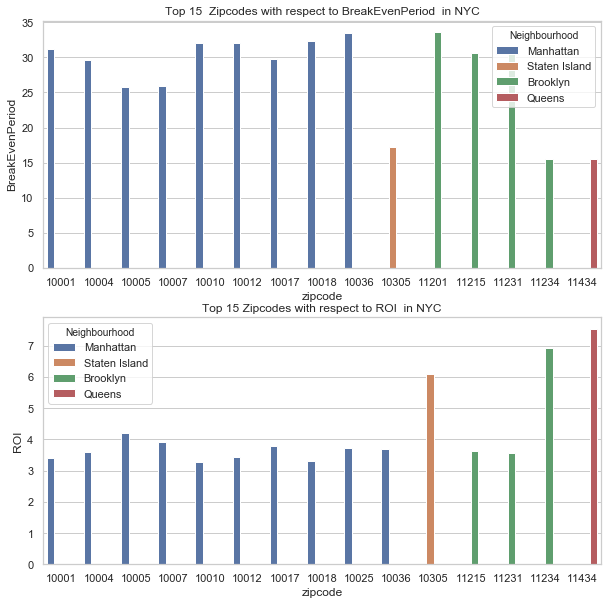

In [100]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']
    
columns2 = ['Neighbourhood', 'zipcode']

showBestZipcodes(15, FinalGreater10, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

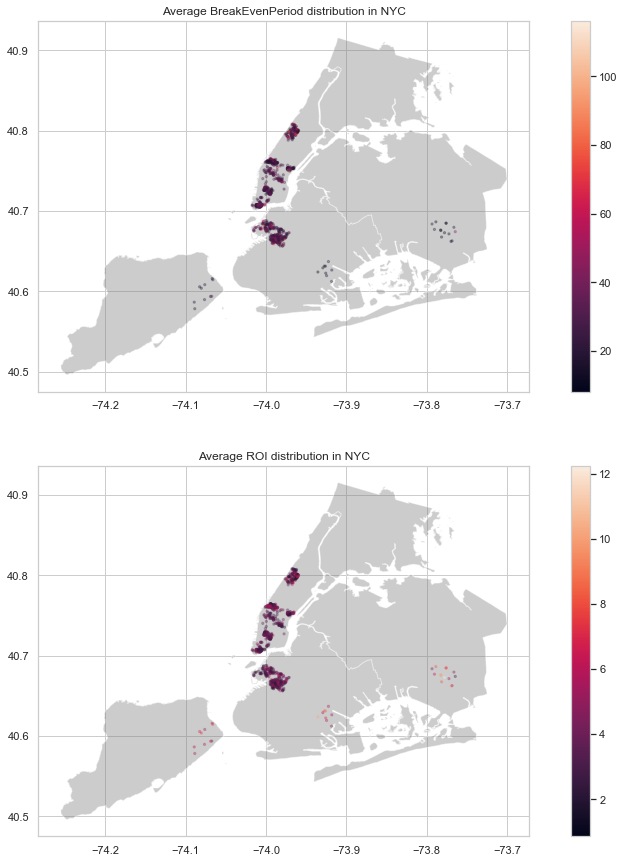

In [101]:
d1 = ZillownBnb.loc[ZillownBnb.zipcode.isin(['10038', '10010', '10012', '10004', '10001', '11231', '11215', '10036',
                                             '10025', '10017', '10007', '10005', '10305', '11234', '11434'])]

geometry = [Point(xy) for xy in zip(d1['longitude'], d1['latitude'])]

geo_df = gpd.GeoDataFrame(d1, crs = crs, geometry = geometry)

locationMapOn(attribute1='BreakEvenPeriod', attribute2='ROI', data=geo_df)

**Conclusions:**


1. The best 15 Zipcodes observed with more than 5 observation samples are  '10038', '10010', '10012', '10004', '10001', '11231', '11215', '10036', '10025', '10017', '10007', '10005', '10305', '11234', '11434'.


2. Manhattan is clearly the best neighbourhood to invest because Break Even Period and ROI is comparatively better.


3. Manhattan has the most lucrative zipcodes because Annual Revenue in this borough is high.


4. Staten Islands are inexpensive in buying a property, therefore more profits and even faster Break Even Periods. But, not many properties were listed in the dataset so it is hard to comment on this neighbourhood. Neverthless, o far from our analysis we can conclude that **Zipcode 10305 from Staten Islands is the best area to invest in along with zipcode 11434 (Queens).**


**Next step**

Let us look into each neighbourhood and then come to final conclusion.

<center > Neighbourhood Analysis: </center>

**Manhattan**

['10036' '10025' '10017' '10007' '10005']


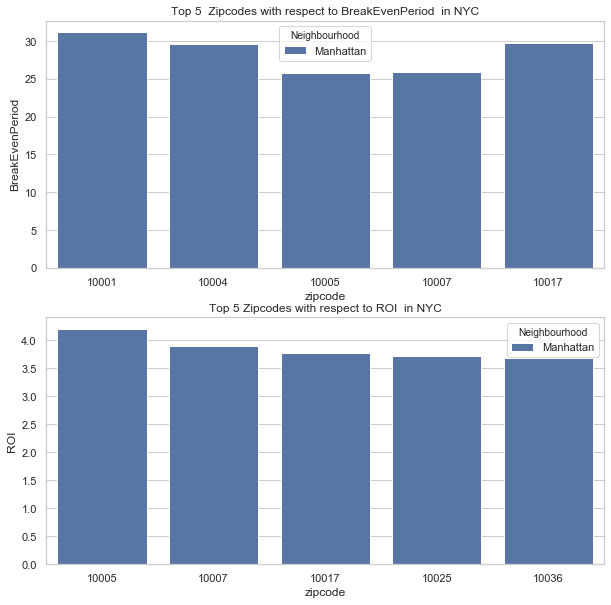

In [102]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']
    
columns2 = ['Neighbourhood', 'zipcode']

data = FinalGreater10[FinalGreater10['Neighbourhood']=='Manhattan']

showBestZipcodes(5, data, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

**Brooklyn**

['11217' '11231' '11385' '11215' '11234']


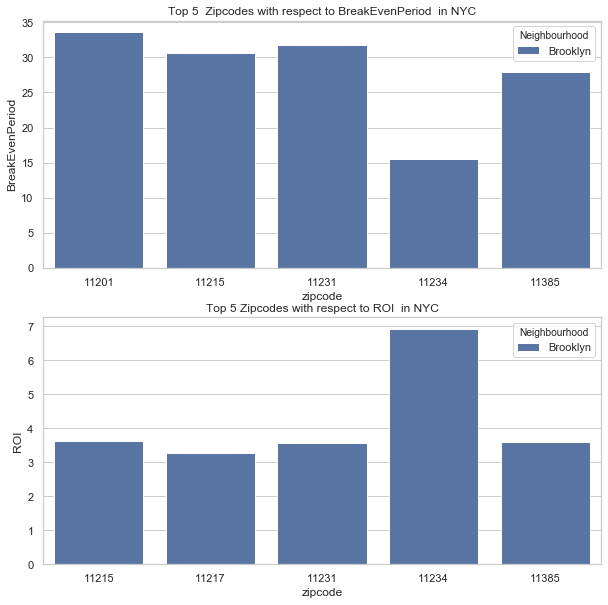

In [103]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'ROI', 'BreakEvenPeriod']
    
columns2 = ['Neighbourhood', 'zipcode']

data = FinalGreater10[FinalGreater10['Neighbourhood']=='Brooklyn']

showBestZipcodes(5, data, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

**Staten Island**

['10301' '10310' '10305']


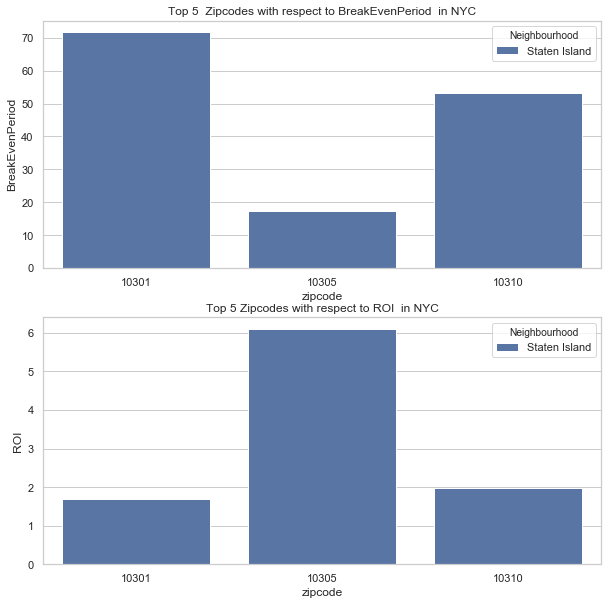

In [104]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']
    
columns2 = ['Neighbourhood', 'zipcode']

data = FinalGreater10[FinalGreater10['Neighbourhood']=='Staten Island']

showBestZipcodes(5, data, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

**Queens**

['11377' '11373' '11692' '11358' '11434']


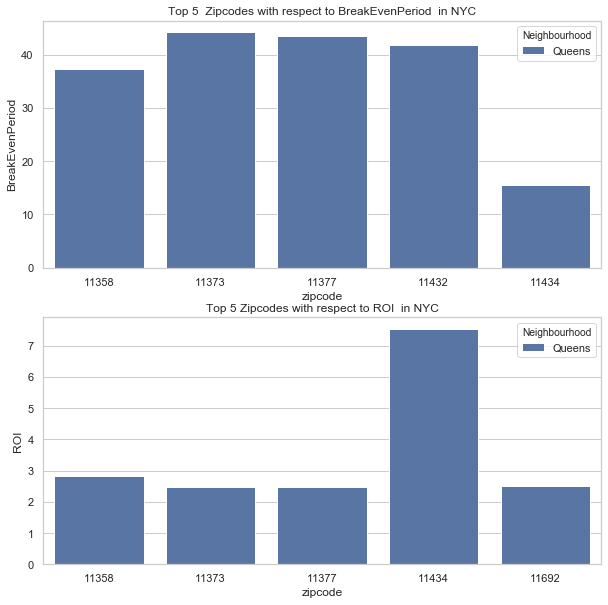

In [105]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']
    
columns2 = ['Neighbourhood', 'zipcode']

data = FinalGreater10[FinalGreater10['Neighbourhood']=='Queens']

showBestZipcodes(5, data, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

**Bronx**

['10469' '10456' '10473' '10454' '10451']


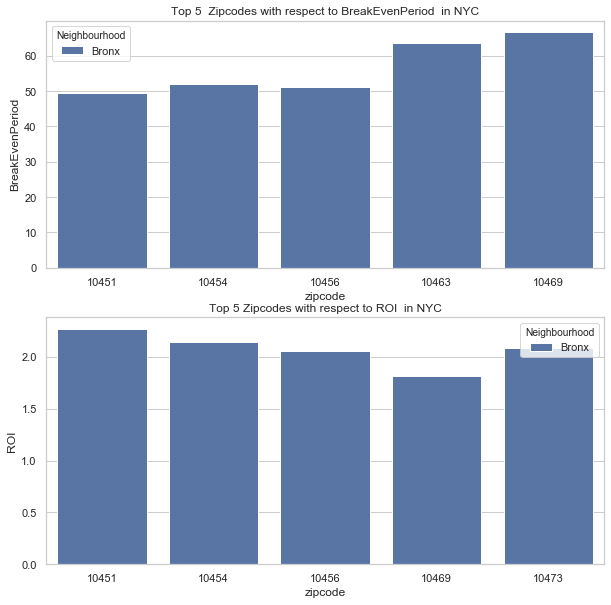

In [106]:
columns1 = ['zipcode', 'Property Cost', 'AnnualRevenue', 
              'AnnualOperatingCost', 'AnnualProfit', 'BreakEvenPeriod', 'ROI']
    
columns2 = ['Neighbourhood', 'zipcode']

data = FinalGreater10[FinalGreater10['Neighbourhood']=='Bronx']

showBestZipcodes(5, data, columns1, columns2, 'zipcode', 'BreakEvenPeriod', 'ROI')

##  <span style="color:green"> <center>  Conclusions and Future Scope

Analysis conducted on finding best zipcodes to invest in got variety of results. In general top 5 zipcodes are **10305(Staten Islands), 11234(Brooklyn), 11434(Queens), 10005(Manhattan) & 10007(Manhattan).** All these Zipcodes have atleast 5 properties listed in the dataset so that our analysis would not be volatile. Diversifying our investment by investing in  boroughs best zipcodes can also yield profits.


Below are the overall conclusions from our analysis:



**Manhattan:**


1. Almost 44% of our data is collected form this neighbourhood, i.e... stable comments can be made.


2. Most expensive neighbourhood with the average property cost of almost $$ 2 Million and Average price nightly when rented out is $ 230.


3. Most profitable zipcodes for long term returns as annual revenue is high in this borough.


4. Best location to stay in when compared among its neighbours with average location reviews of 9.7.


5. Top 5 zipcodes are '10036', '10025', '10017', '10007' & '10005'.



**Brookly:**


1. 45% of our data is collected from Brooklyn, comments made by analysing this data is more stabel just like manhattan.


2. Propery cost is around $$ 1.5 Million and price per night is $150.


3. Brooklyn is all most popular neighbourhood to stay in with location reviews of 9.48.


4. Top 5 zipcodes are '11201', '11217', '11231', '11215' & '11234'.



**Queens:**


1. A decent neighbourhood with not more than 500 observations.


2. Average Location reviews are 9.4, moderately good.


3. Propery cost is around $$ 1.4 Million and price per night is $130.


4. Top 5 zipcodes are '11101', '11105', '11432', '11693' & '11434'.


5. **11434** needs special mention as it is one of the most lucrative properties with excellent ROI and faster Break even period.



**Staten Islands:**


1. Not very expensive neighbourhood with best returns.


2. Second best rated boroughs in New York City.


3. Property cost is around $$1 million and price per night is $100.


4. In general most lucrative properties are from Staten Islands but discarded because those zipcodes consist of less than 5 observations listed on our dataset. Neverthless best zipcodes irrespective of number of listings are '10314', '10309', '10305', '10304' & '10308'.


5. Staten Islands can be considered as best place to invest in with more observations we can confidently conclude the above results. In any case **10305** is one of the most lucrative properties with excellent ROI and faster Break even period and listings more than 5.



**Bronx:**


1. Not so popular neighborhood.


2. This neighborhood is neither have faster Break even period nor better ROI.


3. Properties are expensive with average property cost is around $$ 13 Million and price per night is $100.


4. In fact this is the only property which is not recommended to invest in because the fastest break even can be in 50 years(from 10451).



**Finally Queens and Staten Islands are best boroughs to invest - Low investment Quicker profits. Manhattan and Brooklyn are best for longterm investments.**


###  <span style="color:green"> <center>Future Scope:


1. Property cost for all the listings were not available, they are imputed using KNN, it is better to collect property costs of all Zipcodes for more accurate analysis.


2. There are multiple factors affecting the bookings such as Holidaya seasons, discounts, weekends etc is not considered in our analysis. With approximate number of bookings per listing, we would have assessed this.


3. The airbnb data provided is scrapped as of 2017 and the Zillow data provided is time series data till June, 2017. If the airbnb data for December 2019 is available, we would have considered the price fluctuations, seasonality, serial correlations and other time series concepts to derive the most accruate results.


4. NLP with deep learning can be done on description can give sentimental analysis to provide potential insights on each listing.


5. For each listing attributes like host details etc can also be analysed for any influential conclusions.


6. Competitor Analysis is one major area, which the company should look into, as analyzing the strategy of competitors is necessary. If competitors are agressive in their pricing or marketing strategies, then the real estate company would have to make additional investments for marketing or choose certain other zipcodes with lesser competition.

